In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_all = pd.read_csv("yearly_full_release_long_format.csv")


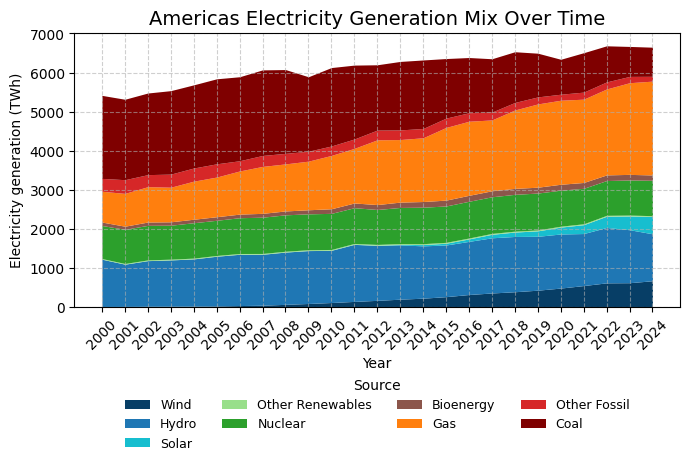

In [ ]:

df_americas = df_all[
    (df_all["Continent"].isin(["North America", "South America"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()

mix_americas = df_americas.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_americas = (
    mix_americas
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)


energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]


energy_order = [e for e in energy_order if e in mix_pivot_americas.columns]
mix_pivot_americas = mix_pivot_americas[energy_order]


energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_americas.columns]

fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_americas.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Americas Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_americas.index)
ax.set_xticklabels(mix_pivot_americas.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


ValueError: Line is not a valid plot kind Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

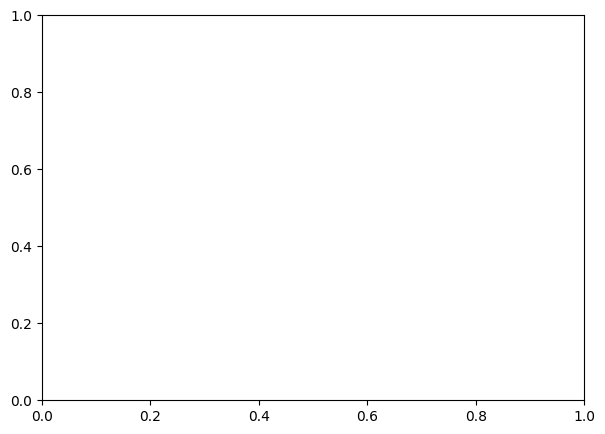

In [ ]:
df_americas = df_all[
    (df_all["Continent"].isin(["North America", "South America"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "TWh")
].copy()

mix_americas = df_americas.groupby(["Year", "Variable"], as_index=False)["Value"].sum()

mix_pivot_americas = (
    mix_americas
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]


energy_order = [e for e in energy_order if e in mix_pivot_americas.columns]
mix_pivot_americas = mix_pivot_americas[energy_order]

energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables":"#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_americas.columns]

fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_americas.plot(
    kind="Line",
    stacked=False,
    linewidth=2,
    ax=ax,
    color=colors
)

ax.set_title("americas Electricity Generation Mix Over Time", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_americas.index)
ax.set_xticklabels(mix_pivot_americas.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

# Legend follows column order automatically
ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()

In [ ]:

df_americas_quota = mix_americas.copy()

df_americas_quota["Quota"] = (
    df_americas_quota["Value"] /
    df_americas_quota.groupby("Year")["Value"].transform("sum")
)


df_americas_quota.head()


,Year,Variable,Value,Quota
0,2000,Bioenergy,88.45,0.016337
1,2000,Coal,2126.45,0.392759
2,2000,Gas,788.41,0.145621
3,2000,Hydro,1211.20,0.223711
4,2000,Nuclear,846.63,0.156374


In [ ]:

df_americas_quota.groupby("Year")["Quota"].sum()


Year
2000    1.0
2001    1.0
2002    1.0
2003    1.0
2004    1.0
2005    1.0
2006    1.0
2007    1.0
2008    1.0
2009    1.0
2010    1.0
2011    1.0
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
2020    1.0
2021    1.0
2022    1.0
2023    1.0
2024    1.0
Name: Quota, dtype: float64

In [ ]:

mix_americas_aggregate = df_all[
    (df_all["Continent"].isin(["North America", "South America"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Aggregate fuel") &
    (df_all["Unit"] == "TWh")
].copy()

mix_americas_aggregate.head()
df_americas_quota = mix_americas_aggregate.copy()

df_americas_quota["Quota"] = (
    df_americas_quota["Value"] /
    df_americas_quota.groupby("Year")["Value"].transform("sum")
)


In [ ]:


df_americas_quota.head()


,Area,ISO 3 code,Year,Area type,Continent,Ember region,EU,OECD,G20,G7,ASEAN,Category,Subcategory,Variable,Unit,Value,YoY absolute change,YoY % change,Quota
9593,Antigua and Barbuda,ATG,2000,Country or economy,North America,Latin America and Caribbean,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Clean,TWh,0.00,NaN,NaN,0.000000
9594,Antigua and Barbuda,ATG,2000,Country or economy,North America,Latin America and Caribbean,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Fossil,TWh,0.15,NaN,NaN,0.000016
9595,Antigua and Barbuda,ATG,2000,Country or economy,North America,Latin America and Caribbean,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Gas and Other Fossil,TWh,0.15,NaN,NaN,0.000016
9596,Antigua and Barbuda,ATG,2000,Country or economy,North America,Latin America and Caribbean,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,"Hydro, Bioenergy and Other Renewables",TWh,0.00,NaN,NaN,0.000000
9597,Antigua and Barbuda,ATG,2000,Country or economy,North America,Latin America and Caribbean,0.0,0.0,0.0,0.0,0.0,Electricity generation,Aggregate fuel,Renewables,TWh,0.00,NaN,NaN,0.000000


In [ ]:


df_americas_quota.groupby("Year")["Quota"].sum()

df_production_mix_americas_2000_2025 = (
    df_americas_quota
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)
df_production_mix_americas_2000_2025.head(9)
df_production_mix_americas_2000_2025["Quota"] = (
    df_production_mix_americas_2000_2025["Value"] /
    df_production_mix_americas_2000_2025["Value"].sum()
)
df_production_mix_americas_2000_2025["Quota"].sum()
df_plot = df_production_mix_americas_2000_2025.sort_values("Quota", ascending=False)

df_americas_quota_2000_2010 = df_americas_quota[df_americas_quota["Year"] <= 2010]
df_americas_quota_2010_2024 = df_americas_quota[df_americas_quota["Year"] > 2010]
df_production_mix_americas_2000_2010 = (
    df_americas_quota_2000_2010
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)


df_production_mix_americas_2010_2025 = (
    df_americas_quota_2010_2024
    .groupby("Variable", as_index=False)["Value"]
    .sum()
)

df_production_mix_americas_2000_2010["Quota"] = (
    df_production_mix_americas_2000_2010["Value"] /
    df_production_mix_americas_2000_2010["Value"].sum()
)

df_production_mix_americas_2010_2025["Quota"] = (
    df_production_mix_americas_2010_2025["Value"] /
    df_production_mix_americas_2010_2025["Value"].sum()
)


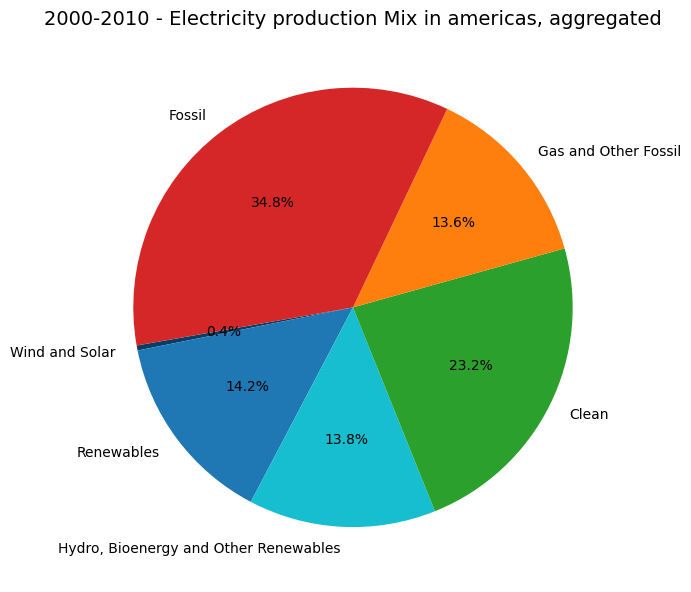

In [ ]:
df_source = df_production_mix_americas_2000_2010


energy_order = [
    "Wind and Solar",
    "Renewables",
    "Hydro, Bioenergy and Other Renewables",
    "Clean",
    "Gas and Other Fossil",
    "Fossil"
]


energy_color_map = {
    "Wind and Solar": "#073e66",                         
    "Renewables": "#1f77b4",                             
    "Hydro, Bioenergy and Other Renewables": "#17becf",  
    "Clean": "#2ca02c",                                  
    "Gas and Other Fossil": "#ff7f0e",                   
    "Fossil": "#d62728"                                  
}


df_plot = df_source.copy()

energy_order_plot = [e for e in energy_order if e in df_plot["Variable"].values]

df_plot["Variable"] = pd.Categorical(
    df_plot["Variable"],
    categories=energy_order_plot,
    ordered=True
)

df_plot = df_plot.sort_values("Variable")

colors = [energy_color_map[v] for v in df_plot["Variable"]]

fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    df_plot["Quota"],
    labels=df_plot["Variable"],      
    colors=colors,
    autopct="%1.1f%%",
    startangle=190
)

ax.set_title("2000-2010 - Electricity production Mix in americas, aggregated", fontsize=14)

plt.tight_layout()
plt.show()


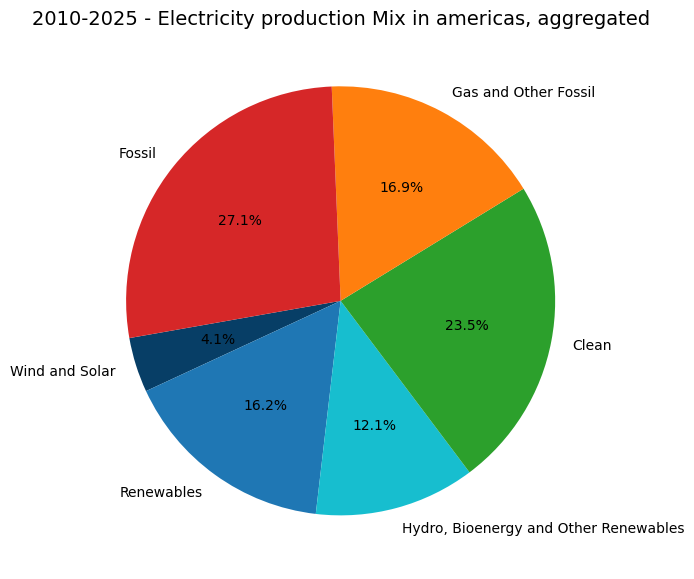

In [ ]:

df_source = df_production_mix_americas_2010_2025

energy_order = [
    "Wind and Solar",
    "Renewables",
    "Hydro, Bioenergy and Other Renewables",
    "Clean",
    "Gas and Other Fossil",
    "Fossil"
]


energy_color_map = {
    "Wind and Solar": "#073e66",                         
    "Renewables": "#1f77b4",                             
    "Hydro, Bioenergy and Other Renewables": "#17becf",  
    "Clean": "#2ca02c",                                  
    "Gas and Other Fossil": "#ff7f0e",                   
    "Fossil": "#d62728"                                 
}


df_plot = df_source.copy()

energy_order_plot = [e for e in energy_order if e in df_plot["Variable"].values]

df_plot["Variable"] = pd.Categorical(
    df_plot["Variable"],
    categories=energy_order_plot,
    ordered=True
)

df_plot = df_plot.sort_values("Variable")

colors = [energy_color_map[v] for v in df_plot["Variable"]]

fig, ax = plt.subplots(figsize=(7, 7))

ax.pie(
    df_plot["Quota"],
    labels=df_plot["Variable"],     
    colors=colors,
    autopct="%1.1f%%",
    startangle=190
)

ax.set_title("2010-2025 - Electricity production Mix in americas, aggregated", fontsize=14)

plt.tight_layout()
plt.show()


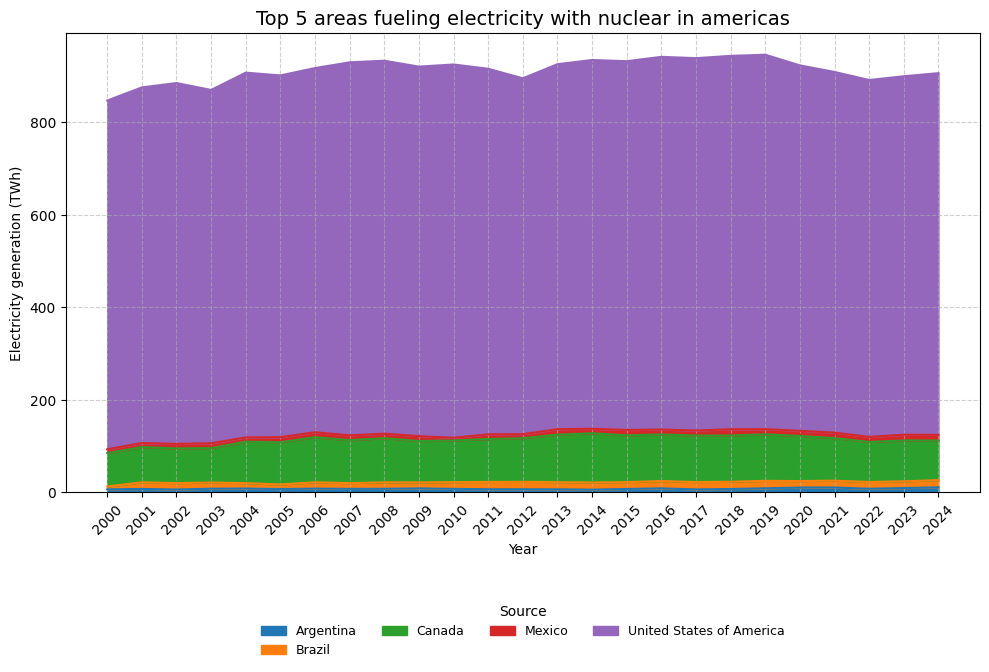

In [ ]:

df_nuclear_americas = df_all[
    (df_all["Continent"].isin(["North America", "South America"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Nuclear") &
    (df_all["Unit"] == "TWh")
].copy()
df_nuclear_americas.head()
nuclear_comparison_americas = df_nuclear_americas.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_nuclear = (
    nuclear_comparison_americas
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

nuclear_comparison_top5 = nuclear_comparison_americas[
    nuclear_comparison_americas["Area"].isin(top_5_areas_nuclear)]

mix_pivot_nuclear_americas = (
    nuclear_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_nuclear_americas.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with nuclear in americas", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_nuclear_americas.index)
ax.set_xticklabels(mix_pivot_nuclear_americas.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


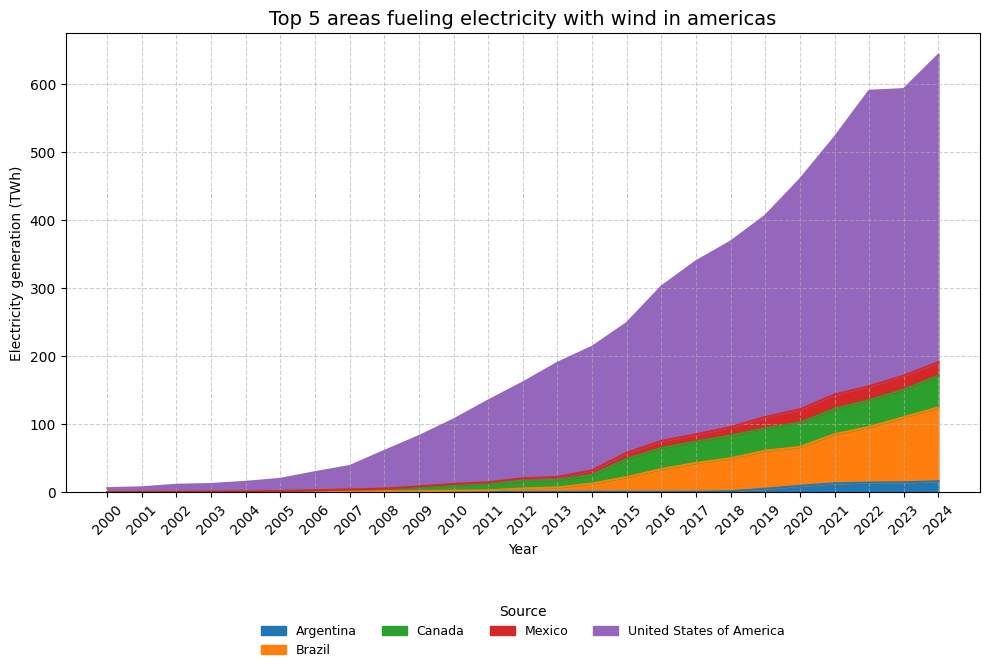

In [ ]:

df_wind_americas = df_all[
    (df_all["Continent"].isin(["North America", "South America"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Wind") &
    (df_all["Unit"] == "TWh")
].copy()

wind_comparison_americas = df_wind_americas.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_wind = (
    wind_comparison_americas
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

wind_comparison_top5 = wind_comparison_americas[
    wind_comparison_americas["Area"].isin(top_5_areas_wind)]
mix_pivot_wind_americas = (
    wind_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_wind_americas.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with wind in americas", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_wind_americas.index)
ax.set_xticklabels(mix_pivot_wind_americas.index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


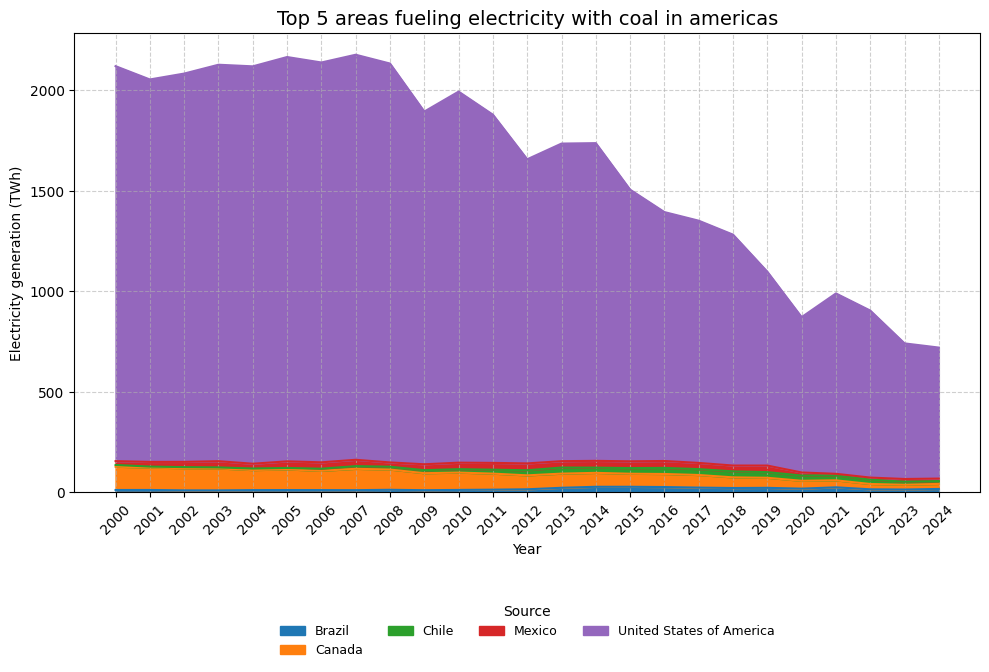

In [ ]:

df_coal_americas = df_all[
    (df_all["Continent"].isin(["North America", "South America"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Electricity generation") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Variable"] == "Coal") &
    (df_all["Unit"] == "TWh")
].copy()

coal_comparison_americas = df_coal_americas.groupby(["Year", "Area"], as_index=False)["Value"].sum()

top_5_areas_coals = (
    coal_comparison_americas
    .groupby("Area")["Value"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

coal_comparison_top5 = coal_comparison_americas[
    coal_comparison_americas["Area"].isin(top_5_areas_coals)]
mix_pivot_coal_americas = (
    coal_comparison_top5
    .pivot(index="Year", columns="Area", values="Value")
    .fillna(0)
)

fig, ax = plt.subplots(figsize=(10, 7)) 

mix_pivot_coal_americas.plot(
    kind="area",
    stacked=True,
    ax=ax
)

ax.set_title("Top 5 areas fueling electricity with coal in americas", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Electricity generation (TWh)")

ax.set_xticks(mix_pivot_coal_americas.index)
ax.set_xticklabels(mix_pivot_coal_americas
                   .index, rotation=45)

ax.grid(
    True,
    axis="both",
    linestyle="--",
    alpha=0.6
)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,                
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


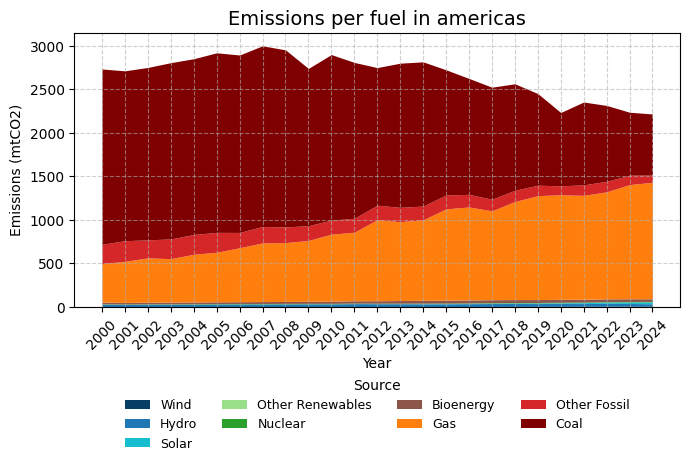

In [ ]:
df_americas_emissions = df_all[
    (df_all["Continent"].isin(["North America", "South America"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Power sector emissions") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "mtCO2")
].copy()

mix_americas_emissions = df_americas_emissions.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_americas_emissions = (
    mix_americas_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

energy_order = [e for e in energy_order if e in mix_pivot_americas_emissions.columns]
mix_pivot_americas_emissions = mix_pivot_americas_emissions[energy_order]

energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_americas_emissions.columns]

fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_americas_emissions.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Emissions per fuel in americas", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (mtCO2)")

ax.set_xticks(mix_pivot_americas_emissions.index)
ax.set_xticklabels(mix_pivot_americas_emissions.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()


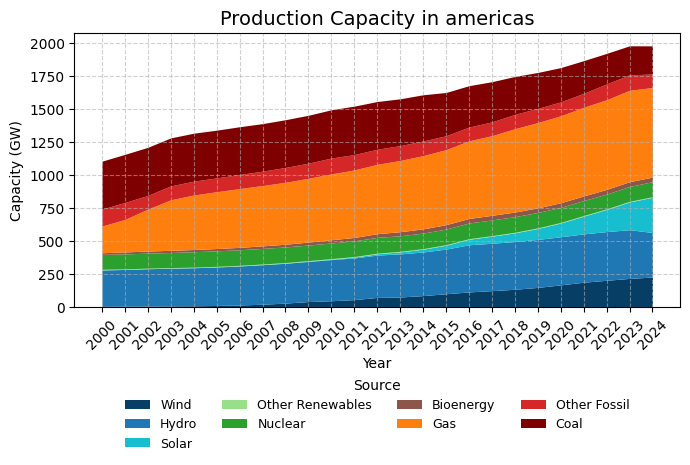

In [ ]:
df_americas_emissions = df_all[
    (df_all["Continent"].isin(["North America", "South America"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Capacity") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "GW")
].copy()

mix_americas_emissions = df_americas_emissions.groupby(
    ["Year", "Variable"], as_index=False
)["Value"].sum()

mix_pivot_americas_emissions = (
    mix_americas_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

energy_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Nuclear",
    "Bioenergy",
    "Gas",
    "Other Fossil",
    "Coal"
]

energy_order = [e for e in energy_order if e in mix_pivot_americas_emissions.columns]
mix_pivot_americas_emissions = mix_pivot_americas_emissions[energy_order]

energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[e] for e in mix_pivot_americas_emissions.columns]


fig, ax = plt.subplots(figsize=(7, 5))

mix_pivot_americas_emissions.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors
)

ax.set_title("Production Capacity in americas", fontsize=14)
ax.set_xlabel("Year")
ax.set_ylabel("Capacity (GW)")

ax.set_xticks(mix_pivot_americas_emissions.index)
ax.set_xticklabels(mix_pivot_americas_emissions.index, rotation=45)

ax.grid(True, axis="both", linestyle="--", alpha=0.6)

ax.legend(
    title="Source",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.22),
    ncol=4,
    fontsize=9,
    title_fontsize=10,
    frameon=False
)

plt.tight_layout()
plt.show()
